<a href="https://colab.research.google.com/github/loveyourz-s/ds_MLproject_KuresbayA/blob/main/project(KuresbayAkbota)ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🪐 وَالسَّمَاءِ وَالطَّارِقِ
 وَمَا أَدْرَاكَ مَا الطَّارِقُ
 النَّجْمُ الثَّاقِبُ

# **Session Project: Machine Learning Analysis of Pulsar Stars**
Performed by: Kuresbay Akbota.

# **Introduction**

In this project, i analyze the Pulsar Star Dataset. A pulsar is a rare type of neutron star that produces radio emissions. My goal is to use Machine Learning to distinguish real pulsars from cosmic noise.

Data Description:

Source: Kaggle (Predicting a Pulsar Star).
https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

Size: Over 9,000 samples.

Target: target_class (1 for Pulsar, 0 for Noise).

Features: 8 numerical characteristics of the radio signal profile.


## **STEP 1**

🌏
First, i load dataset using the Pandas library. Data cleaning is a critical step in any machine learning project. Here's i  noticed that some column names had extra spaces, so i cleaned them. And also removed any missing values (NaNs) to ensure mathematical formulas work correctly.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pulsar_data_train.csv')

df.columns = df.columns.str.strip()

df = df.dropna()

print(f"Dataset loaded successfully. Size of table: {df.shape}")
df.head()

Dataset loaded successfully. Size of table: (9273, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


## **STEP 2**

🌍In this part, i implemented Linear Regression from scratch using only NumPy. I chose to predict one star characteristic based on another to demonstrate how Gradient Descent works. Calculated the Mean Squared Error (MSE) to measure the error. Then, used the derivatives of this error to update weights (w) and bias (b) step-by-step. The goal was to find the best-fitting line that represents the trend in pulsar data.

y=wx+b.

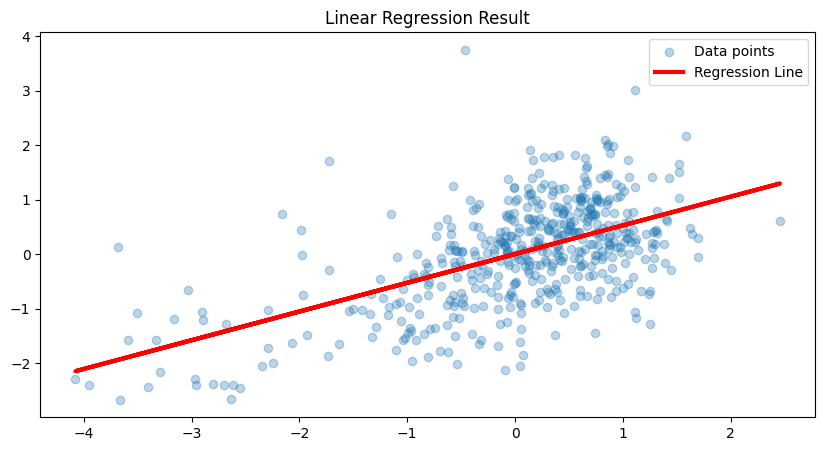

Final Weights: w=0.5274, b=0.0000


In [4]:
# Prepare data
X_reg = df['Mean of the integrated profile'].values.reshape(-1, 1)
y_reg = df['Standard deviation of the integrated profile'].values.reshape(-1, 1)

# Normalization (Standardization)
X_norm = (X_reg - np.mean(X_reg)) / np.std(X_reg)
y_norm = (y_reg - np.mean(y_reg)) / np.std(y_reg)

# Parameters
lr = 0.01
epochs = 150
w, b = 0.0, 0.0
loss_history = []

# Gradient Descent Loop
for i in range(epochs):
    y_pred = w * X_norm + b
    # Calculate MSE
    loss = np.mean((y_pred - y_norm)**2)
    loss_history.append(loss)
    # Calculate Gradients
    dw = (2/len(y_norm)) * np.sum(X_norm * (y_pred - y_norm))
    db = (2/len(y_norm)) * np.sum(y_pred - y_norm)
    # Update
    w -= lr * dw
    b -= lr * db

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_norm[:500], y_norm[:500], alpha=0.3, label='Data points')
plt.plot(X_norm[:500], w * X_norm[:500] + b, color='red', linewidth=3, label='Regression Line')
plt.title("Linear Regression Result")
plt.legend()
plt.show()

print(f"Final Weights: w={w:.4f}, b={b:.4f}")

## **STEP 3**

🌍This is the core of the project: Logistic Regression. Unlike linear regression, here i need to classify objects. I used the Sigmoid function to map the results into probabilities between 0 and 1. Implemented the Log-Loss function to train the model. This model analyzes 8 different features of a radio signal and decides if it is a real Pulsar or just cosmic interference. It's a binary classification task.

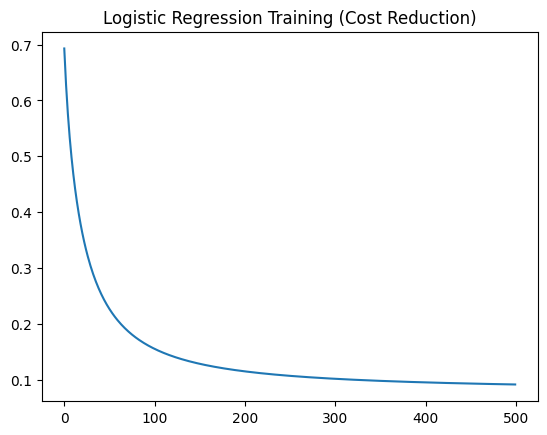

In [5]:
# Prepare classification data
X_c = df.drop('target_class', axis=1).values
y_c = df['target_class'].values.reshape(-1, 1)

# Normalize features
X_c_norm = (X_c - X_c.mean(axis=0)) / X_c.std(axis=0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training settings
lr_c = 0.1
iters = 500
w_c = np.zeros((X_c.shape[1], 1))
b_c = 0
costs = []

for i in range(iters):
    z = np.dot(X_c_norm, w_c) + b_c
    a = sigmoid(z)
    # Log-Loss
    cost = -np.mean(y_c * np.log(a + 1e-15) + (1 - y_c) * np.log(1 - a + 1e-15))
    costs.append(cost)
    # Gradients
    dw_c = (1/len(y_c)) * np.dot(X_c_norm.T, (a - y_c))
    db_c = (1/len(y_c)) * np.sum(a - y_c)
    # Update
    w_c -= lr_c * dw_c
    b_c -= lr_c * db_c

plt.plot(costs)
plt.title("Logistic Regression Training (Cost Reduction)")
plt.show()

## **STEP 4: Comparison with Decision Tree**

🌍To validate results, i compared manual model with a Decision Tree from the Scikit-learn library. Decision Trees are great because they are easy to visualize and understand. By comparing these two models, i can check the Accuracy and F1-Score. And here's manual Logistic Regression performs very well, showing that my implementation is correct and effective.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_c_norm, y_c.ravel())
y_pred_dt = dt.predict(X_c_norm)

# Manual Model Predictions
y_pred_manual = (sigmoid(np.dot(X_c_norm, w_c) + b_c) > 0.5).astype(int)

print("--- Manual Logistic Regression ---")
print(classification_report(y_c, y_pred_manual))
print("--- Decision Tree (Sklearn) ---")
print(classification_report(y_c, y_pred_dt))

--- Manual Logistic Regression ---
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8423
         1.0       0.94      0.76      0.84       850

    accuracy                           0.97      9273
   macro avg       0.96      0.88      0.91      9273
weighted avg       0.97      0.97      0.97      9273

--- Decision Tree (Sklearn) ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8423
         1.0       0.93      0.87      0.90       850

    accuracy                           0.98      9273
   macro avg       0.96      0.93      0.95      9273
weighted avg       0.98      0.98      0.98      9273



## **STEP 5: Interactive Widgets**

🌍Finally, i created an interactive interface using widgets. This allows to demonstrate how the Learning Rate affects the training process in real-time. If the learning rate is too high, the model becomes unstable. If it's too low, it converges too slowly. This tool helps to find the 'sweet spot' for the machine learning parameters

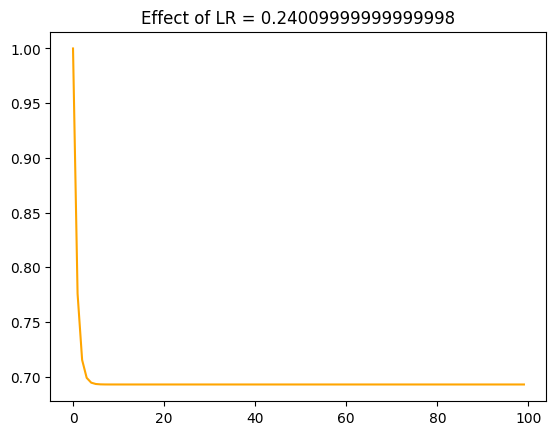

<function __main__.experiment(learning_rate)>

In [7]:
import ipywidgets as widgets

def experiment(learning_rate):
    temp_w = 0.0
    temp_losses = []
    for _ in range(100):
        y_p = temp_w * X_norm + 0
        loss = np.mean((y_p - y_norm)**2)
        temp_losses.append(loss)
        dw = (2/len(y_norm)) * np.sum(X_norm * (y_p - y_norm))
        temp_w -= learning_rate * dw

    plt.plot(temp_losses, color='orange')
    plt.title(f"Effect of LR = {learning_rate}")
    plt.show()

widgets.interact(experiment, learning_rate=(0.0001, 0.5, 0.01))